Fan, Y., Min, Z., Alsolami, S., Ma, Z., Zhang, E., Chen, W., Zhong, K., Pei, W., Kang, X., Zhang, P., et al. (2021). [Generation of human blastocyst-like structures from pluripotent stem cells](https://doi.org/10.1038/s41421-021-00316-8). Cell Discovery 7, 1–14.

- BioProject Accession: PRJNA667174
- GEO Accession: GSE158971

In [1]:
Sys.Date()

[1] "2021-09-11"

Load required packages.

In [2]:
library(tidyverse)
library(magrittr)
library(Matrix)
library(patchwork)
library(extrafont)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1.9000 ──

✔ ggplot2 3.3.5.9000     ✔ purrr   0.3.4.9000
✔ tibble  3.1.4.9000     ✔ dplyr   1.0.7.9000
✔ tidyr   1.1.3.9000     ✔ stringr 1.4.0     
✔ readr   2.0.1.9000     ✔ forcats 0.5.1.9000

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registering fonts with R



In [3]:
Sys.time()

[1] "2021-09-11 23:54:26 CDT"

In [4]:
PPI <- 300

# Data preparation

## Functions loading

In [5]:
SCRIPT_DIR <- "/Users/jialei/Dropbox/Data/Projects/UTSW/Scripts/utilities/"

In [6]:
source(
    file = file.path(
        SCRIPT_DIR,
        "utilities.R"
    )
)

## Data loading

In [7]:
PROJECT_DIR <- "/Users/jialei/Dropbox/Data/Projects/UTSW/Peri-implantation"

### Matrix

In [8]:
ad <- reticulate::import(module = "anndata", convert = TRUE)
print(ad$`__version__`)

[1] "0.7.5"


In [9]:
BACKED <- NULL
adata <- ad$read_h5ad(
    filename = file.path(
        PROJECT_DIR,
        "raw/public/PRJNA667174",
        "matrix",
        "adata.h5ad"
    ),
    backed = BACKED
)

matrix_readcount_use <- adata |> convert_adata()
matrix_readcount_use |> dim()

[1] 33538 30439

### Embedding

In [10]:
EMBEDDING_FILE <- "embedding_ncomponents10_ccc1_seed20210719.csv.gz"

embedding <- vroom::vroom(
    file = file.path(
        PROJECT_DIR,
        "raw/public/PRJNA667174",
        "clustering/PRJNA667174/exploring",
        "Scanpy_Harmony",
        EMBEDDING_FILE
    )
)

embedding |> head()

Rows: 30439 Columns: 16

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): cell, batch
dbl (14): louvain, leiden, x_tsne, y_tsne, x_umap, y_umap, x_fitsne, y_fitsn...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cell                        batch      louvain leiden x_tsne    y_tsne    
1 GSM4816780_AAACCCAAGTCACAGG GSM4816780 0        2     -59.61914  -34.25100
2 GSM4816780_AAACCCAAGTTACTCG GSM4816780 3       11      72.60726   81.89310
3 GSM4816780_AAACCCACATAATCGC GSM4816780 5        1      10.69915   11.80464
4 GSM4816780_AAACCCACATCATCTT GSM4816780 4        0     -57.99653   95.91599
5 GSM4816780_AAACCCACATTCCTAT GSM4816780 1        4     -14.01938 -142.56613
6 GSM4816780_AAACCCAGTGCCGTAC GSM4816780 5        1     -10.25328   14.79214
  x_umap    y_umap    x_fitsne   y_fitsne  x_phate      y_phate    
1 -2.434389  8.971638 -68.842922  39.08510 -0.009986567 0.022106139
2 12.410583  2.235562   1.996456 109.53823  0.022806555 0.004384373
3  2.457198 12.121967 -19.368101  37.47894  0.008519046 0.013682752
4 12.462028 11.089141  89.094840  16.18362  0.034066243 0.004965028
5 -6.957992 10.141818 -96.900441 -53.74277 -0.007740232 0.022556250
6  3.759502 11.010690  -6.644542  32.75169  0.010765720 0.012274486
  x_umap_min_dist=0.1 y_umap_min_dist=0.1 x_multicoretsne y_multicoretsne
1 -2.276734            9.453928            1.79053682      0.144051669   
2 12.907623            2.995861            0.04159580      2.531810448   
3  3.231614           10.969112           -0.07175815      0.118877453   
4 11.308686           10.344496           -2.66163936      1.723065925   
5 -5.528971           11.530880            2.63696453     -1.219431250   
6  4.935977           10.719850           -0.41173916     -0.004431131

### Metadata

In [11]:
cell_metadata <- vroom::vroom(
    file = file.path(
        PROJECT_DIR,
        "raw/public/PRJNA667174",
        "matrix",
        "cell_metadata.csv"
    )
) |>
    dplyr::left_join(
        adata$obs |>
            tibble::rownames_to_column(var = "cell")
    )

cell_metadata |> head()

Rows: 30439 Columns: 3

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): cell, lineage, developmental_stage


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Joining, by = "cell"



cell                        lineage developmental_stage batch      num_umis
1 GSM4816780_AAACCCAAGTCACAGG EPI     D6                  GSM4816780 54160   
2 GSM4816780_AAACCCAAGTTACTCG TE      D6                  GSM4816780  1824   
3 GSM4816780_AAACCCACATAATCGC TE      D6                  GSM4816780  5850   
4 GSM4816780_AAACCCACATCATCTT IM      D6                  GSM4816780   898   
5 GSM4816780_AAACCCACATTCCTAT IM      D6                  GSM4816780 36394   
6 GSM4816780_AAACCCAGTGCCGTAC TE      D6                  GSM4816780  4755   
  num_features mt_percentage
1 6368         0.020144018  
2 1041         0.001096491  
3 2212         0.002564103  
4  571         0.011135857  
5 6010         0.012529538  
6 1953         0.001261830

# Single-cell transcriptome analysis

In [12]:
embedding <- embedding |>
    dplyr::left_join(
        cell_metadata |>
            dplyr::select(-batch),
        by = c("cell" = "cell")
    ) |>
    dplyr::mutate(
        developmental_stage = factor(
            developmental_stage,
            levels = c("D6", "D8", "D10")
        ),
        lineage = factor(
            lineage,
            levels = c(
                c("EPI", "PE", "TE", "IM", "CTB", "STB")
            )
        )
    )

In [13]:
embedding |>
    dplyr::group_by(
        batch
    ) |>
    dplyr::summarise(
        num_cells = n(),
        median_umis = median(num_umis),
        num_features = median(num_features),
        median_mt_percentage = median(mt_percentage)
    )

batch      num_cells median_umis num_features median_mt_percentage
1 GSM4816780 10933      6203.0     2240.0       0.007092199         
2 GSM4816781 11634     12780.5     3357.0       0.052984867         
3 GSM4816782  7872     12238.0     3778.5       0.065663483

In [14]:
embedding |>
    dplyr::group_by(
        developmental_stage
    ) |>
    dplyr::summarise(
        num_cells = n(),
        median_umis = median(num_umis),
        num_features = median(num_features),
        median_mt_percentage = median(mt_percentage)
    )

developmental_stage num_cells median_umis num_features median_mt_percentage
1 D6                  10933      6203.0     2240.0       0.007092199         
2 D8                  11634     12780.5     3357.0       0.052984867         
3 D10                  7872     12238.0     3778.5       0.065663483

In [15]:
embedding |>
    dplyr::group_by(
        leiden
    ) |>
    dplyr::summarise(
        num_cells = n(),
        median_umis = median(num_umis),
        num_features = median(num_features),
        median_mt_percentage = median(mt_percentage)
    )

leiden num_cells median_umis num_features median_mt_percentage
1   0     4069       1534.0      831.0       0.021715527         
2   1     3566       4522.0     1807.5       0.008945333         
3   2     3539      30389.0     5452.0       0.055672797         
4   3     3224      23761.0     4960.5       0.058259888         
5   4     2780      26048.0     5237.5       0.055429823         
6   5     2434      23133.5     4583.0       0.041058811         
7   6     2396        796.0      514.5       0.044039793         
8   7     2255       1241.0      710.0       0.011739594         
9   8     1186       3766.0     1760.0       0.082827767         
10  9     1106      17752.0     4222.5       0.054710045         
11 10     1031      24862.0     4980.0       0.044412686         
12 11      966       3412.0     1511.5       0.004119256         
13 12      663      13107.0     3648.0       0.060423344         
14 13      595      31669.0     5599.0       0.053610239         
15 14      363      25393.0     5062.0       0.053125720         
16 15      266       1410.0      735.5       0.038481308

## Embedding visualization

In [16]:
x_column <- "x_umap_min_dist=0.1"
y_column <- "y_umap_min_dist=0.1"


GEOM_POINT_SIZE <- 0.2
EMBEDDING_TITLE_PREFIX <- "UMAP"
RASTERISED <- TRUE

### Clustering & UMI & MT

In [17]:
p_embedding_leiden <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = embedding$leiden |> as.factor(),
    label = paste(EMBEDDING_TITLE_PREFIX, "Leiden", sep = "; "),
    label_position = NULL,
    show_color_value_labels = TRUE,
    show_color_legend = FALSE,
    geom_point_size = GEOM_POINT_SIZE,
    sort_values = FALSE,
    shuffle_values = FALSE,
    rasterise = RASTERISED
) +
    theme_customized()

CB_POSITION <- c(0.8, 0.995)
p_embedding_UMI <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = log10(embedding$num_umis),
    label = paste(EMBEDDING_TITLE_PREFIX, "UMI", sep = "; "),
    label_position = NULL,
    show_color_value_labels = FALSE,
    show_color_legend = TRUE,
    geom_point_size = GEOM_POINT_SIZE,
    sort_values = TRUE,
    shuffle_values = TRUE,
    rasterise = RASTERISED,
    legend_size = 2
) +
    theme_customized(
        x = CB_POSITION[1],
        legend_key_size = 2,
        legend_text_size = 5
    )

p_embedding_MT <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = embedding$mt_percentage,
    label = paste(EMBEDDING_TITLE_PREFIX, "MT%", sep = "; "),
    label_position = NULL,
    show_color_value_labels = FALSE,
    show_color_legend = TRUE,
    geom_point_size = GEOM_POINT_SIZE * 2,
    sort_values = TRUE,
    shuffle_values = TRUE,
    rasterise = RASTERISED,
    legend_size = 2
) +
    theme_customized(
        x = CB_POSITION[1],
        legend_key_size = 2,
        legend_text_size = 5
    )

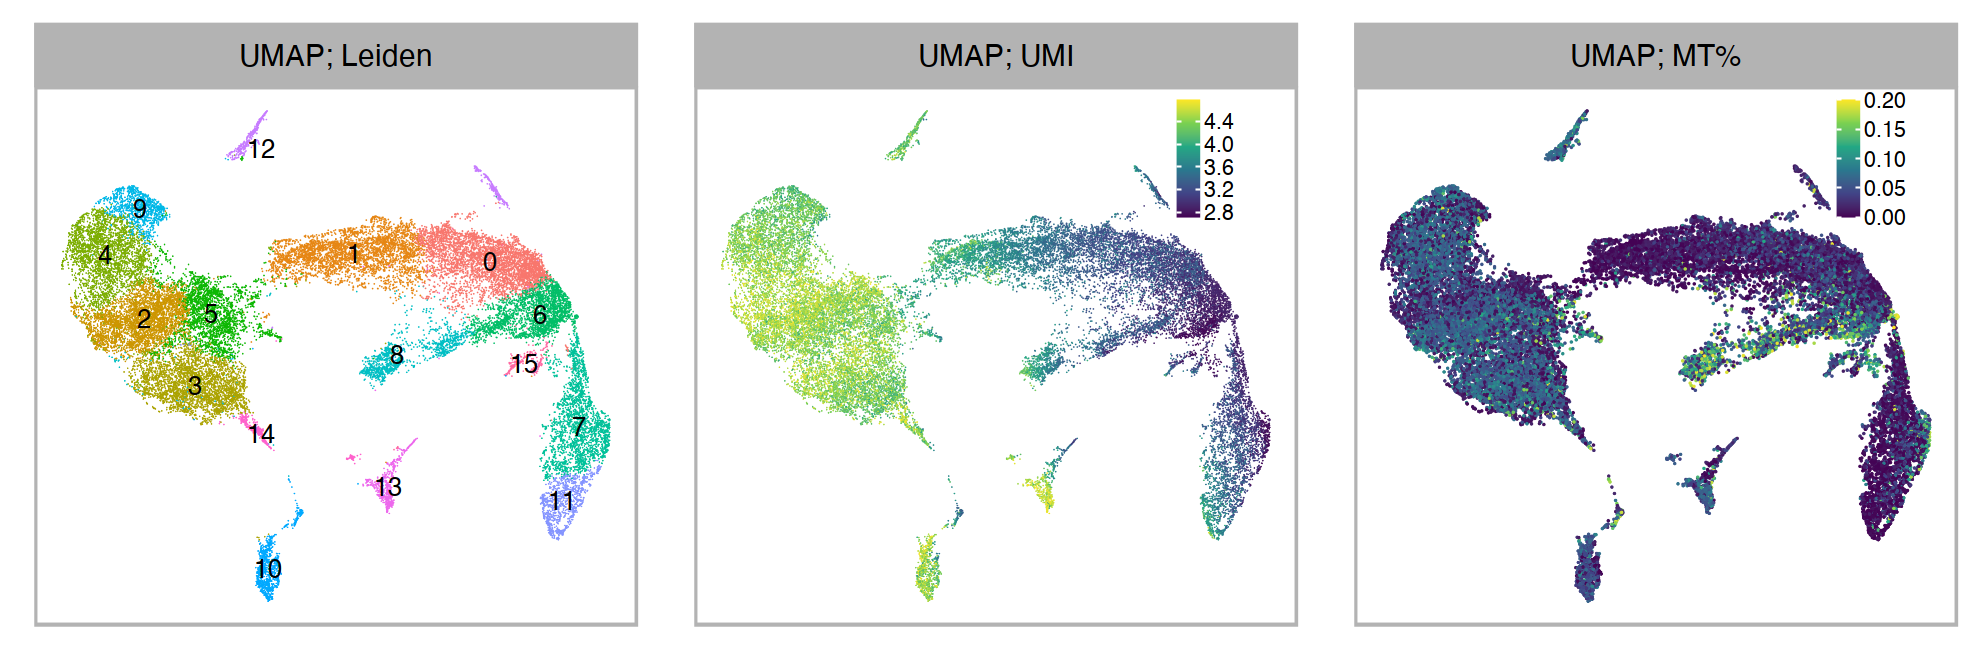

In [18]:
options(repr.plot.width = 6.6, repr.plot.height = 2.2, repr.plot.res = PPI)

purrr::reduce(
    list(
        p_embedding_leiden,
        p_embedding_UMI,
        p_embedding_MT
    ),
    `+`
) +
    patchwork::plot_layout(ncol = 3) +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )

### Lineage & origin & developmental stage

In [19]:
p_embedding_lineage <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = embedding$lineage,
    label = paste(EMBEDDING_TITLE_PREFIX, "Lineage", sep = "; "),
    label_position = NULL,
    show_color_value_labels = FALSE,
    show_color_legend = TRUE,
    geom_point_size = GEOM_POINT_SIZE,
    sort_values = FALSE,
    shuffle_values = TRUE,
    rasterise = RASTERISED,
    legend_size = 2
) +
    theme_customized(
        x = CB_POSITION[1],
        legend_key_size = 2,
        legend_text_size = 5
    )

p_embedding_batch <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = embedding$batch |> as.factor(),
    label = paste(EMBEDDING_TITLE_PREFIX, "Batch", sep = "; "),
    label_position = NULL,
    show_color_value_labels = FALSE,
    show_color_legend = TRUE,
    geom_point_size = GEOM_POINT_SIZE,
    sort_values = FALSE,
    shuffle_values = TRUE,
    rasterise = RASTERISED,
    legend_size = 2
) +
    theme_customized(
        x = CB_POSITION[1] - 0.1,
        legend_key_size = 2,
        legend_text_size = 5
    )

p_embedding_developmental_stage <- plot_embedding(
    embedding = embedding[, c(x_column, y_column)],
    color_values = embedding$developmental_stage |> as.factor(),
    label = paste(EMBEDDING_TITLE_PREFIX, "Developmental stage", sep = "; "),
    label_position = NULL,
    show_color_value_labels = FALSE,
    show_color_legend = TRUE,
    geom_point_size = GEOM_POINT_SIZE,
    sort_values = FALSE,
    shuffle_values = TRUE,
    rasterise = RASTERISED,
    legend_size = 2
) +
    theme_customized(
        x = CB_POSITION[1],
        legend_key_size = 2,
        legend_text_size = 5
    )

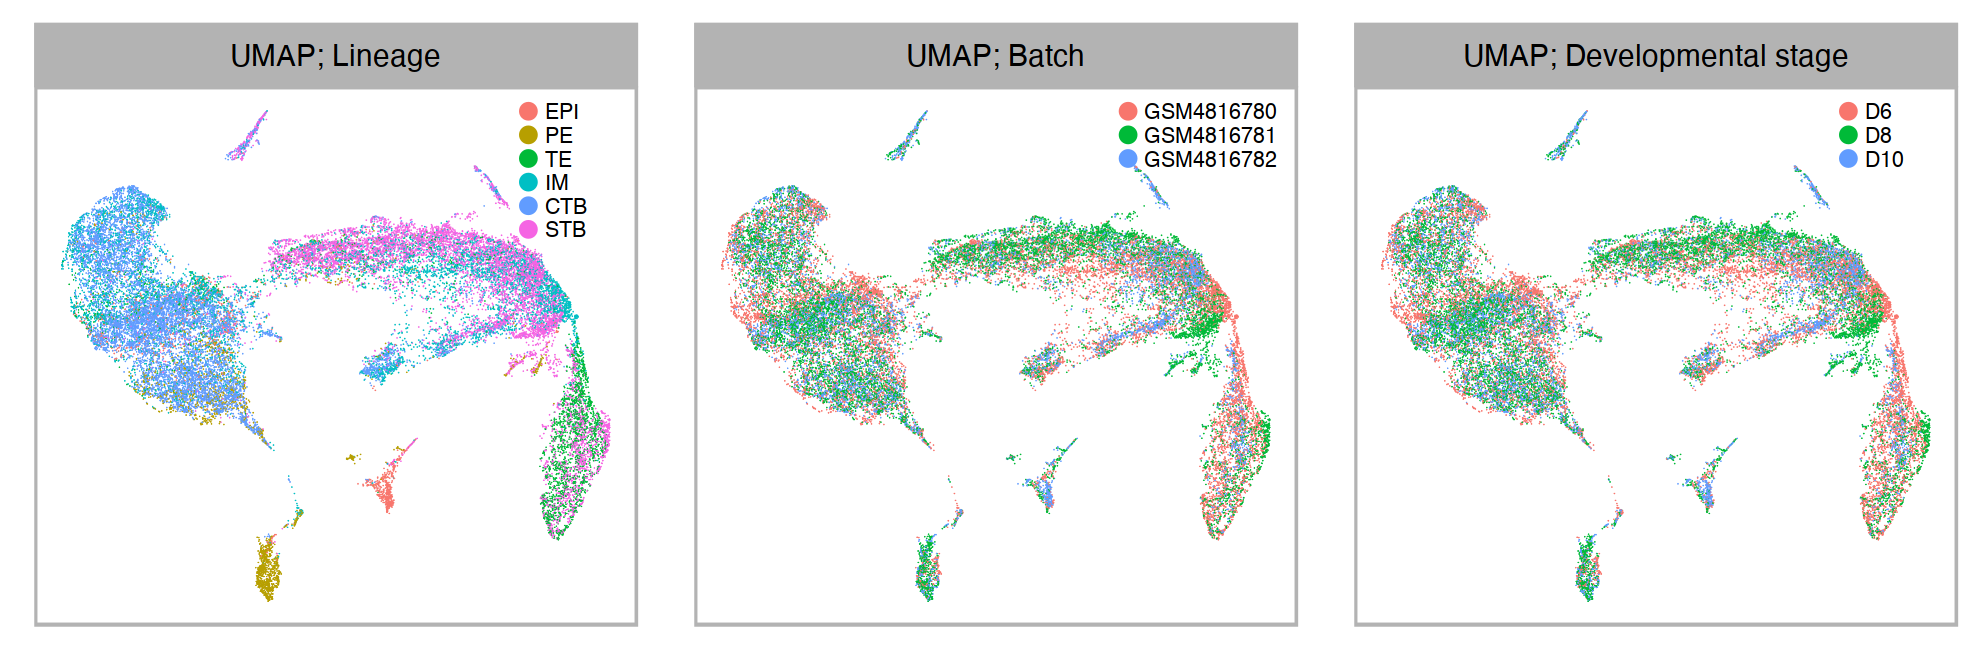

In [20]:
options(repr.plot.width = 6.6, repr.plot.height = 2.2, repr.plot.res = PPI)

purrr::reduce(
    list(
        p_embedding_lineage,
        p_embedding_batch,
        p_embedding_developmental_stage
    ),
    `+`
) +
    patchwork::plot_layout(ncol = 3) +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )

### Developmental stage

In [21]:
embedding |>
    dplyr::group_by(
        developmental_stage
    ) |>
    dplyr::summarise(
        num_cells = n(),
        median_umis = median(num_umis),
        num_features = median(num_features),
        median_mt_percentage = median(mt_percentage)
    )

developmental_stage num_cells median_umis num_features median_mt_percentage
1 D6                  10933      6203.0     2240.0       0.007092199         
2 D8                  11634     12780.5     3357.0       0.052984867         
3 D10                  7872     12238.0     3778.5       0.065663483

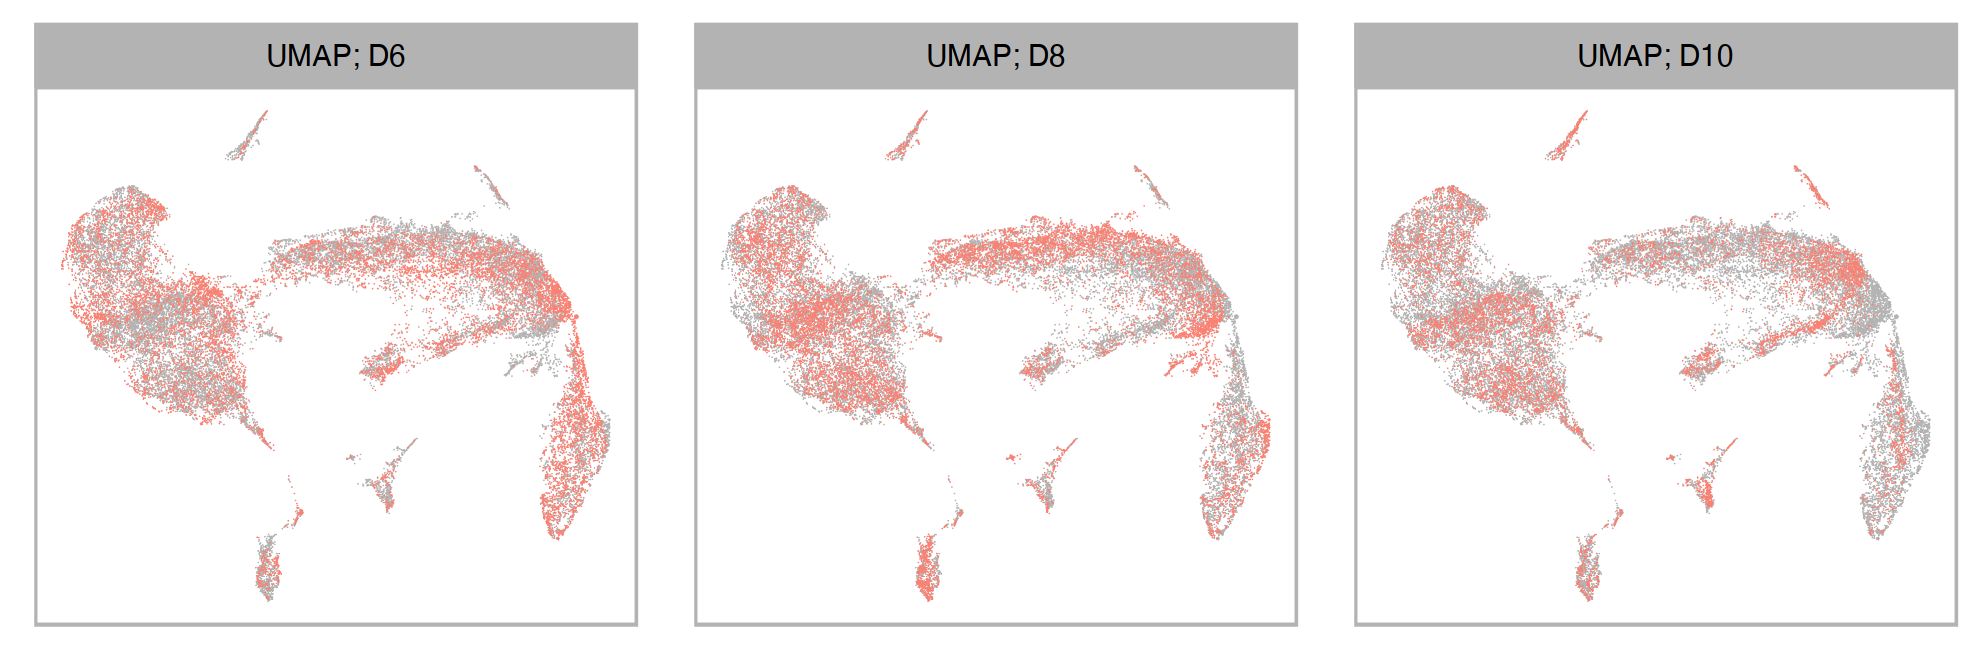

In [22]:
options(repr.plot.width = 6.6, repr.plot.height = 2.2, repr.plot.res = PPI)

purrr::map(levels(embedding$developmental_stage), function(x) {
    plot_embedding(
        embedding = embedding[, c(x_column, y_column)],
        color_values = as.numeric(
            embedding$developmental_stage == x
        ) |> as.factor(),
        label = paste(EMBEDDING_TITLE_PREFIX, x, sep = "; "),
        label_position = NULL,
        show_color_value_labels = FALSE,
        show_color_legend = FALSE,
        geom_point_size = GEOM_POINT_SIZE,
        sort_values = TRUE,
        rasterise = RASTERISED
    ) +
        theme_customized() +
        scale_color_manual(
            values = c("grey70", "salmon")
        )
}) |>
    purrr::reduce(`+`) +
    patchwork::plot_layout(ncol = 3) +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )

### Lineage

In [23]:
embedding |>
    dplyr::group_by(
        lineage
    ) |>
    dplyr::summarise(
        num_cells = n(),
        median_umis = median(num_umis),
        num_features = median(num_features),
        median_mt_percentage = median(mt_percentage)
    ) 

lineage num_cells median_umis num_features median_mt_percentage
1 EPI     1340      28910.0     5194.0       0.018937359         
2 PE      2083      23615.0     4849.0       0.020250376         
3 TE      2472       2253.5     1112.5       0.003417852         
4 IM      6478       4360.5     1841.0       0.008306207         
5 CTB     9438      22634.5     4912.0       0.066582772         
6 STB     8628       2255.5     1219.0       0.030517943

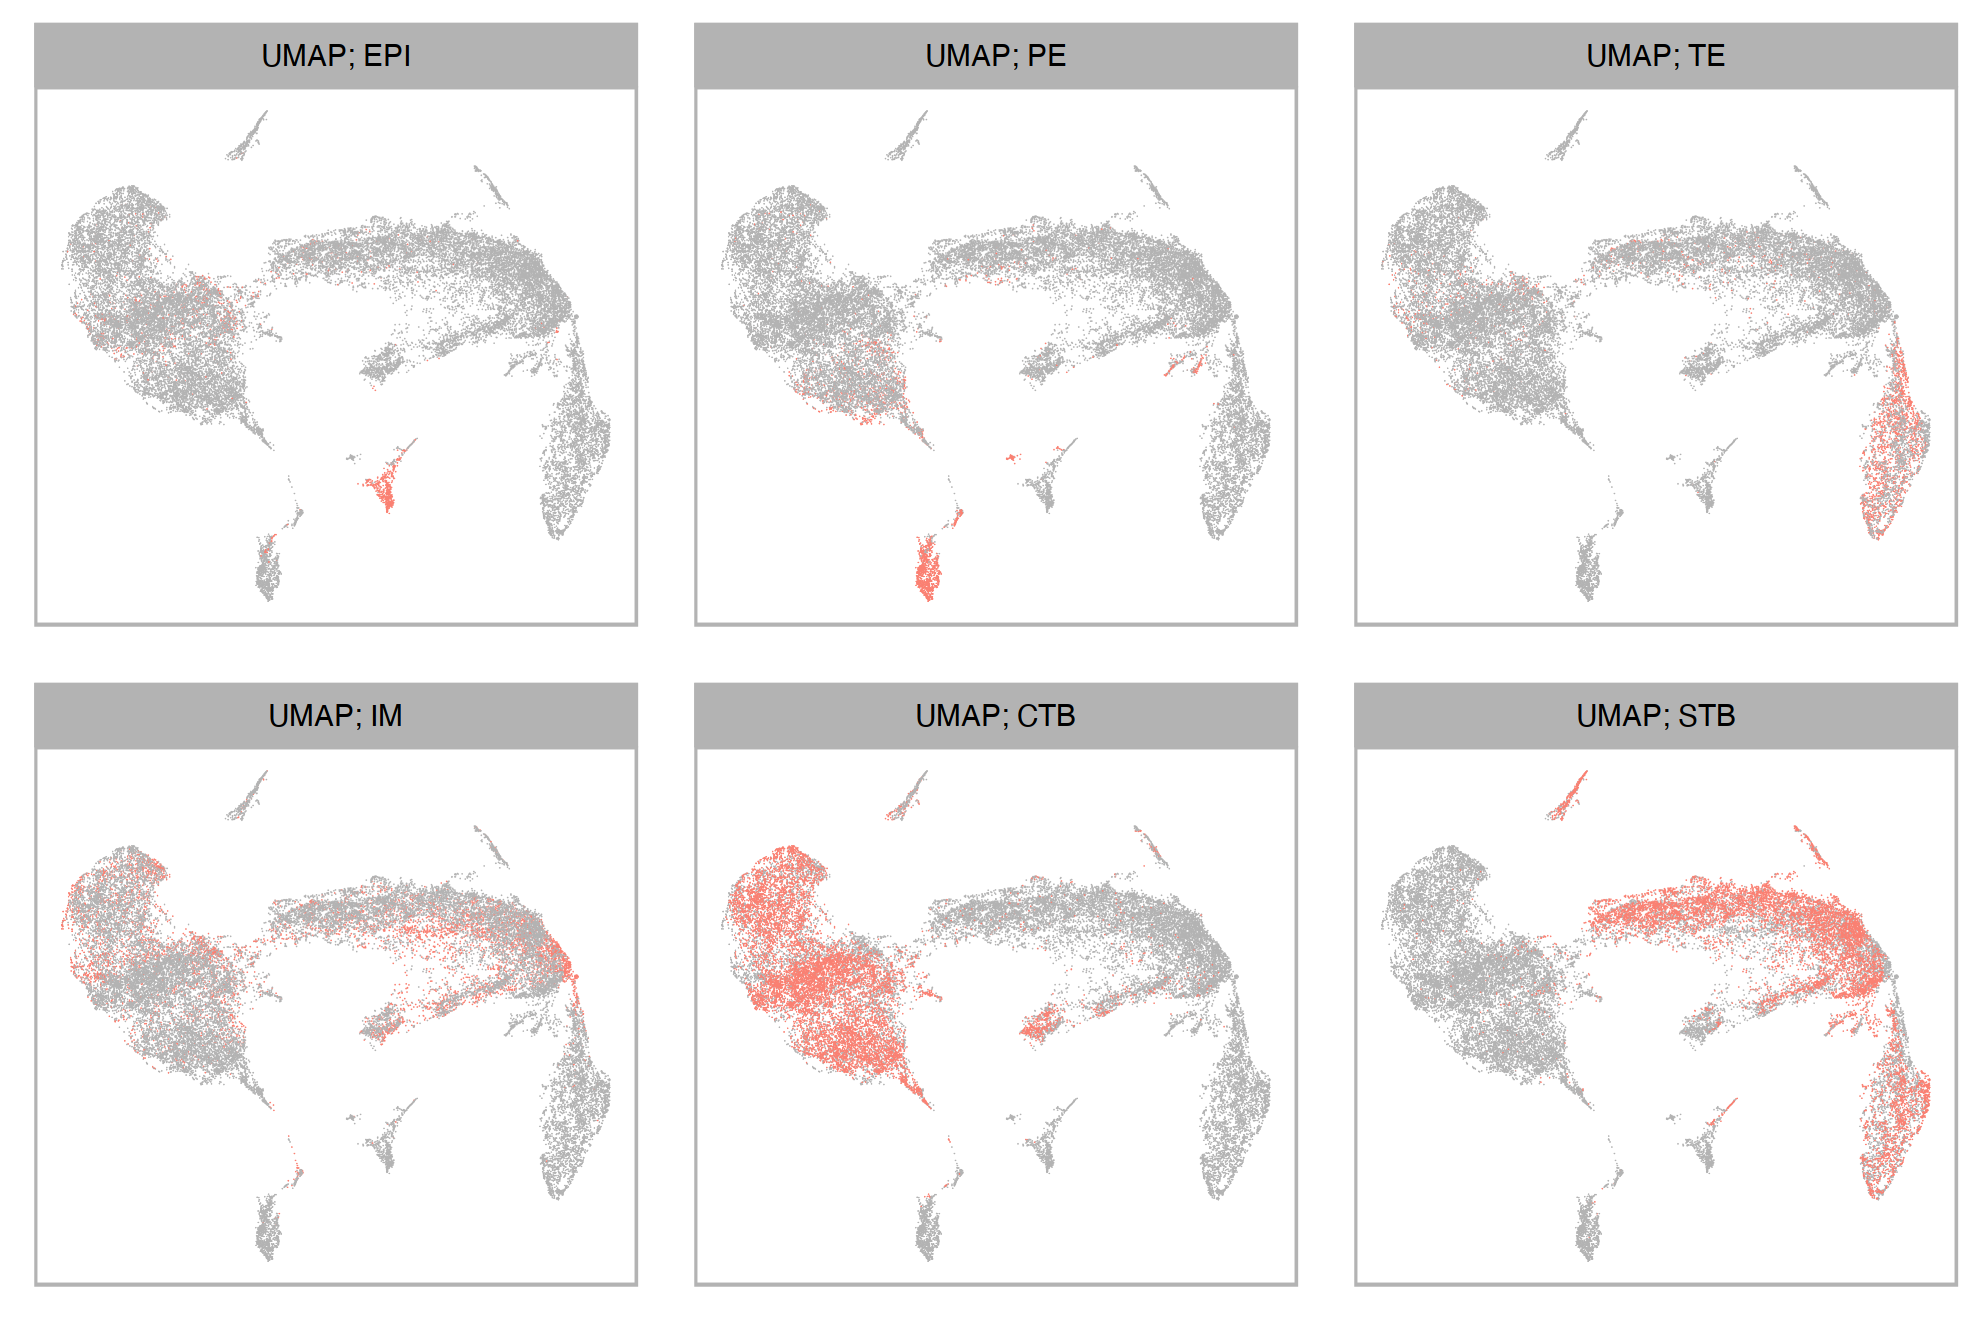

In [24]:
options(repr.plot.width = 6.6, repr.plot.height = 4.4, repr.plot.res = PPI)

purrr::map(levels(embedding$lineage), function(x) {
    plot_embedding(
        embedding = embedding[, c(x_column, y_column)],
        color_values = as.numeric(embedding$lineage == x) |> as.factor(),
        label = paste(EMBEDDING_TITLE_PREFIX, x, sep = "; "),
        label_position = NULL,
        show_color_value_labels = FALSE,
        show_color_legend = FALSE,
        geom_point_size = GEOM_POINT_SIZE,
        sort_values = FALSE,
        rasterise = RASTERISED,
        legend_size = 2
    ) +
        theme_customized(
            x = CB_POSITION[1] - 0.3,
            legend_key_size = 2,
            legend_text_size = 5
        ) +
        scale_color_manual(
            values = c("grey70", "salmon")
        )
}) |>
    purrr::reduce(`+`) +
    patchwork::plot_layout(ncol = 3) +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )

### Composition

`summarise()` has grouped output by 'leiden'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'leiden'. You can override using the `.groups` argument.



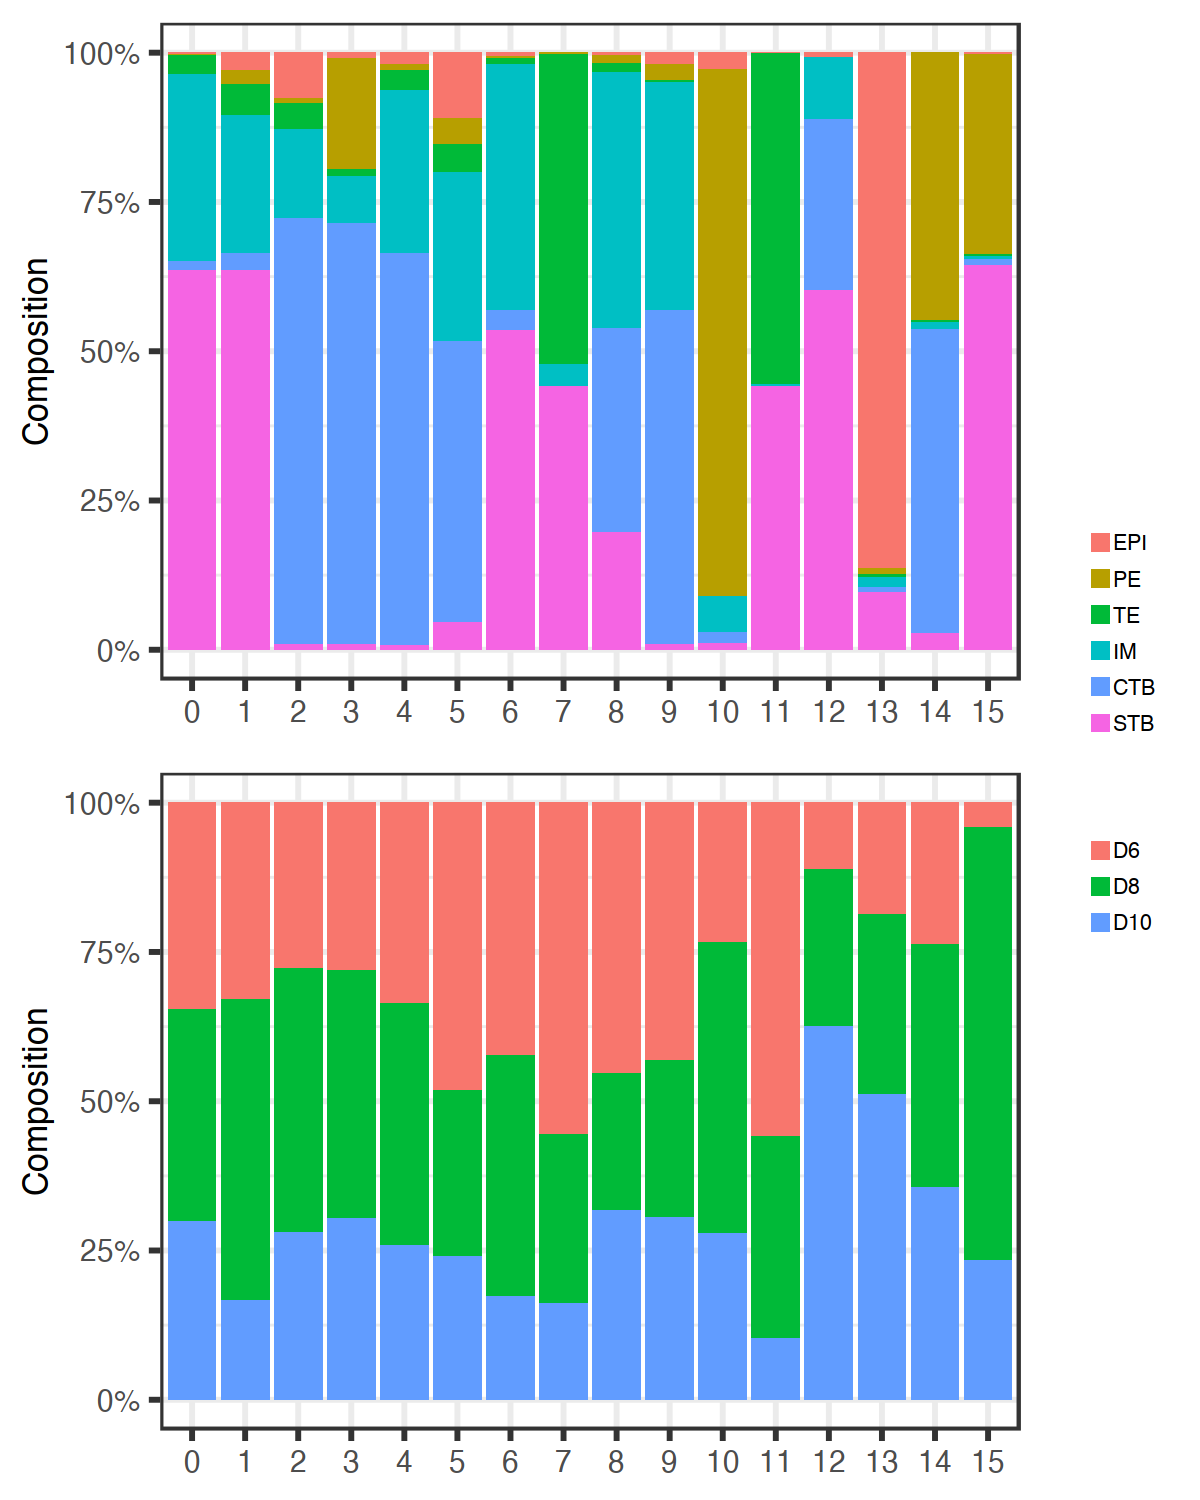

In [25]:
options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = PPI)

p_barplot_composition_developmental_stage <- calc_group_composition(
    data = embedding,
    x = "leiden",
    group = "developmental_stage"
) |>
    dplyr::mutate(
        leiden = factor(leiden)
    ) |>
    plot_barplot(
        x = "leiden",
        y = "percentage",
        z = "developmental_stage",
        legend_ncol = 1
    )

p_barplot_composition_lineage <- calc_group_composition(
    data = embedding,
    x = "leiden",
    group = "lineage"
) |>
    dplyr::mutate(
        leiden = factor(leiden)
    ) |>
    plot_barplot(
        x = "leiden",
        y = "percentage",
        z = "lineage",
        legend_ncol = 1
    )

p_barplot_combined <- list(
    p_barplot_composition_lineage,
    p_barplot_composition_developmental_stage
) |>
    purrr::reduce(`+`) +
    patchwork::plot_layout(nrow = 2, guides = "collect") +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )
p_barplot_combined

`summarise()` has grouped output by 'lineage'. You can override using the `.groups` argument.



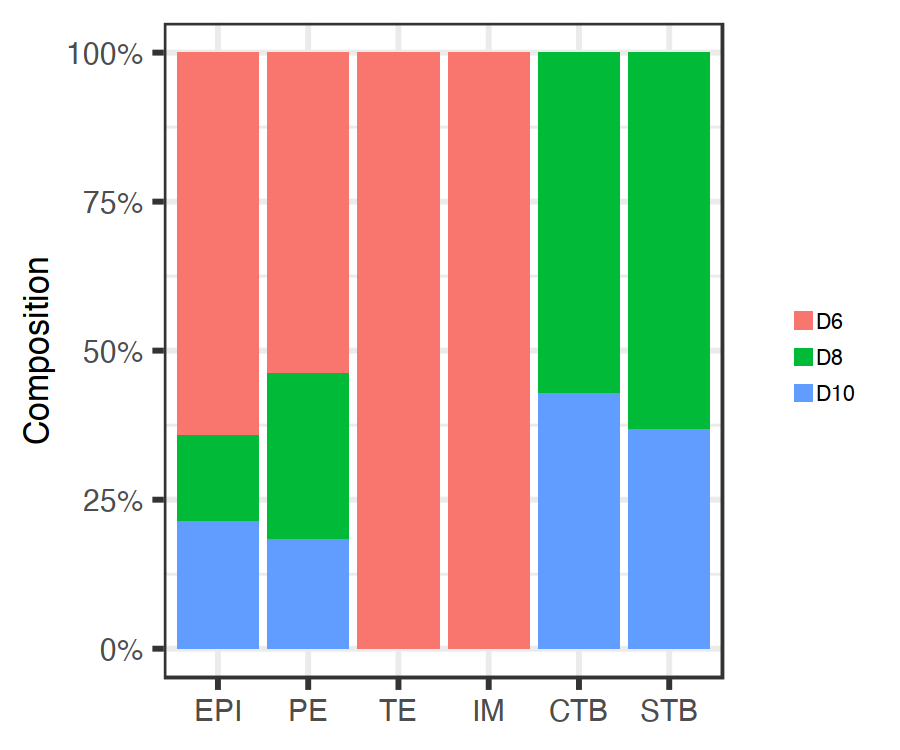

In [26]:
options(repr.plot.width = 3, repr.plot.height = 2.5, repr.plot.res = PPI)

calc_group_composition(
    data = embedding,
    x = "lineage",
    group = "developmental_stage"
) |>
    plot_barplot(
        x = "lineage",
        y = "percentage",
        z = "developmental_stage",
        legend_ncol = 1
    )

`summarise()` has grouped output by 'developmental_stage'. You can override using the `.groups` argument.



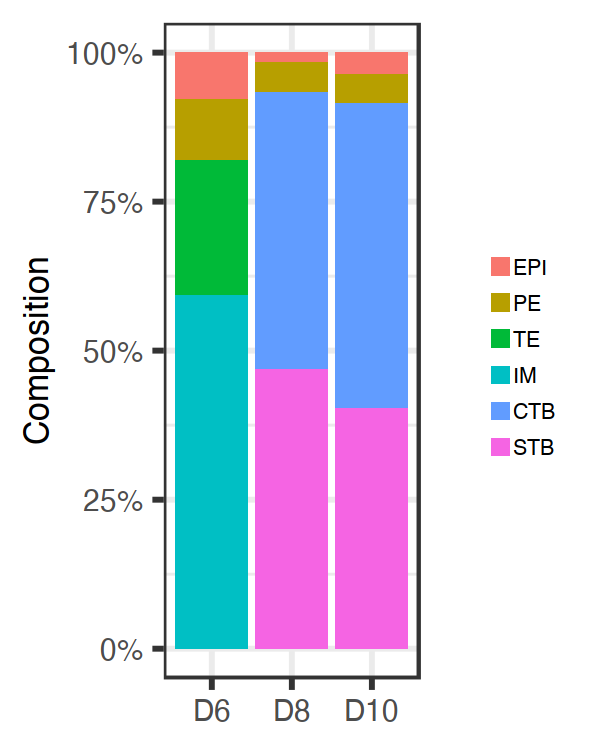

In [27]:
options(repr.plot.width = 2, repr.plot.height = 2.5, repr.plot.res = PPI)

calc_group_composition(
    data = embedding,
    x = "developmental_stage",
    group = "lineage"
) |>
    plot_barplot(
        x = "developmental_stage",
        y = "percentage",
        z = "lineage",
        legend_ncol = 1
    )

## Expression

### Embedding

In [28]:
FEATURES_SELECTED <- c(
    "ENSG00000204531_POU5F1",
    "ENSG00000111704_NANOG",
    "ENSG00000171872_KLF17",
    "ENSG00000186103_ARGFX",
    #
    "ENSG00000164736_SOX17",
    "ENSG00000125798_FOXA2",
    "ENSG00000136574_GATA4",
    "ENSG00000134853_PDGFRA",
    #
    "ENSG00000179348_GATA2",
    "ENSG00000070915_SLC12A3",
    "ENSG00000165556_CDX2",
    "ENSG00000007866_TEAD3"
)

ENSG00000204531_POU5F1 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000111704_NANOG 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000171872_KLF17 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000186103_ARGFX 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000164736_SOX17 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000125798_FOXA2 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000136574_GATA4 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000134853_PDGFRA 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000179348_GATA2 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000070915_SLC12A3 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000165556_CDX2 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



ENSG00000007866_TEAD3 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



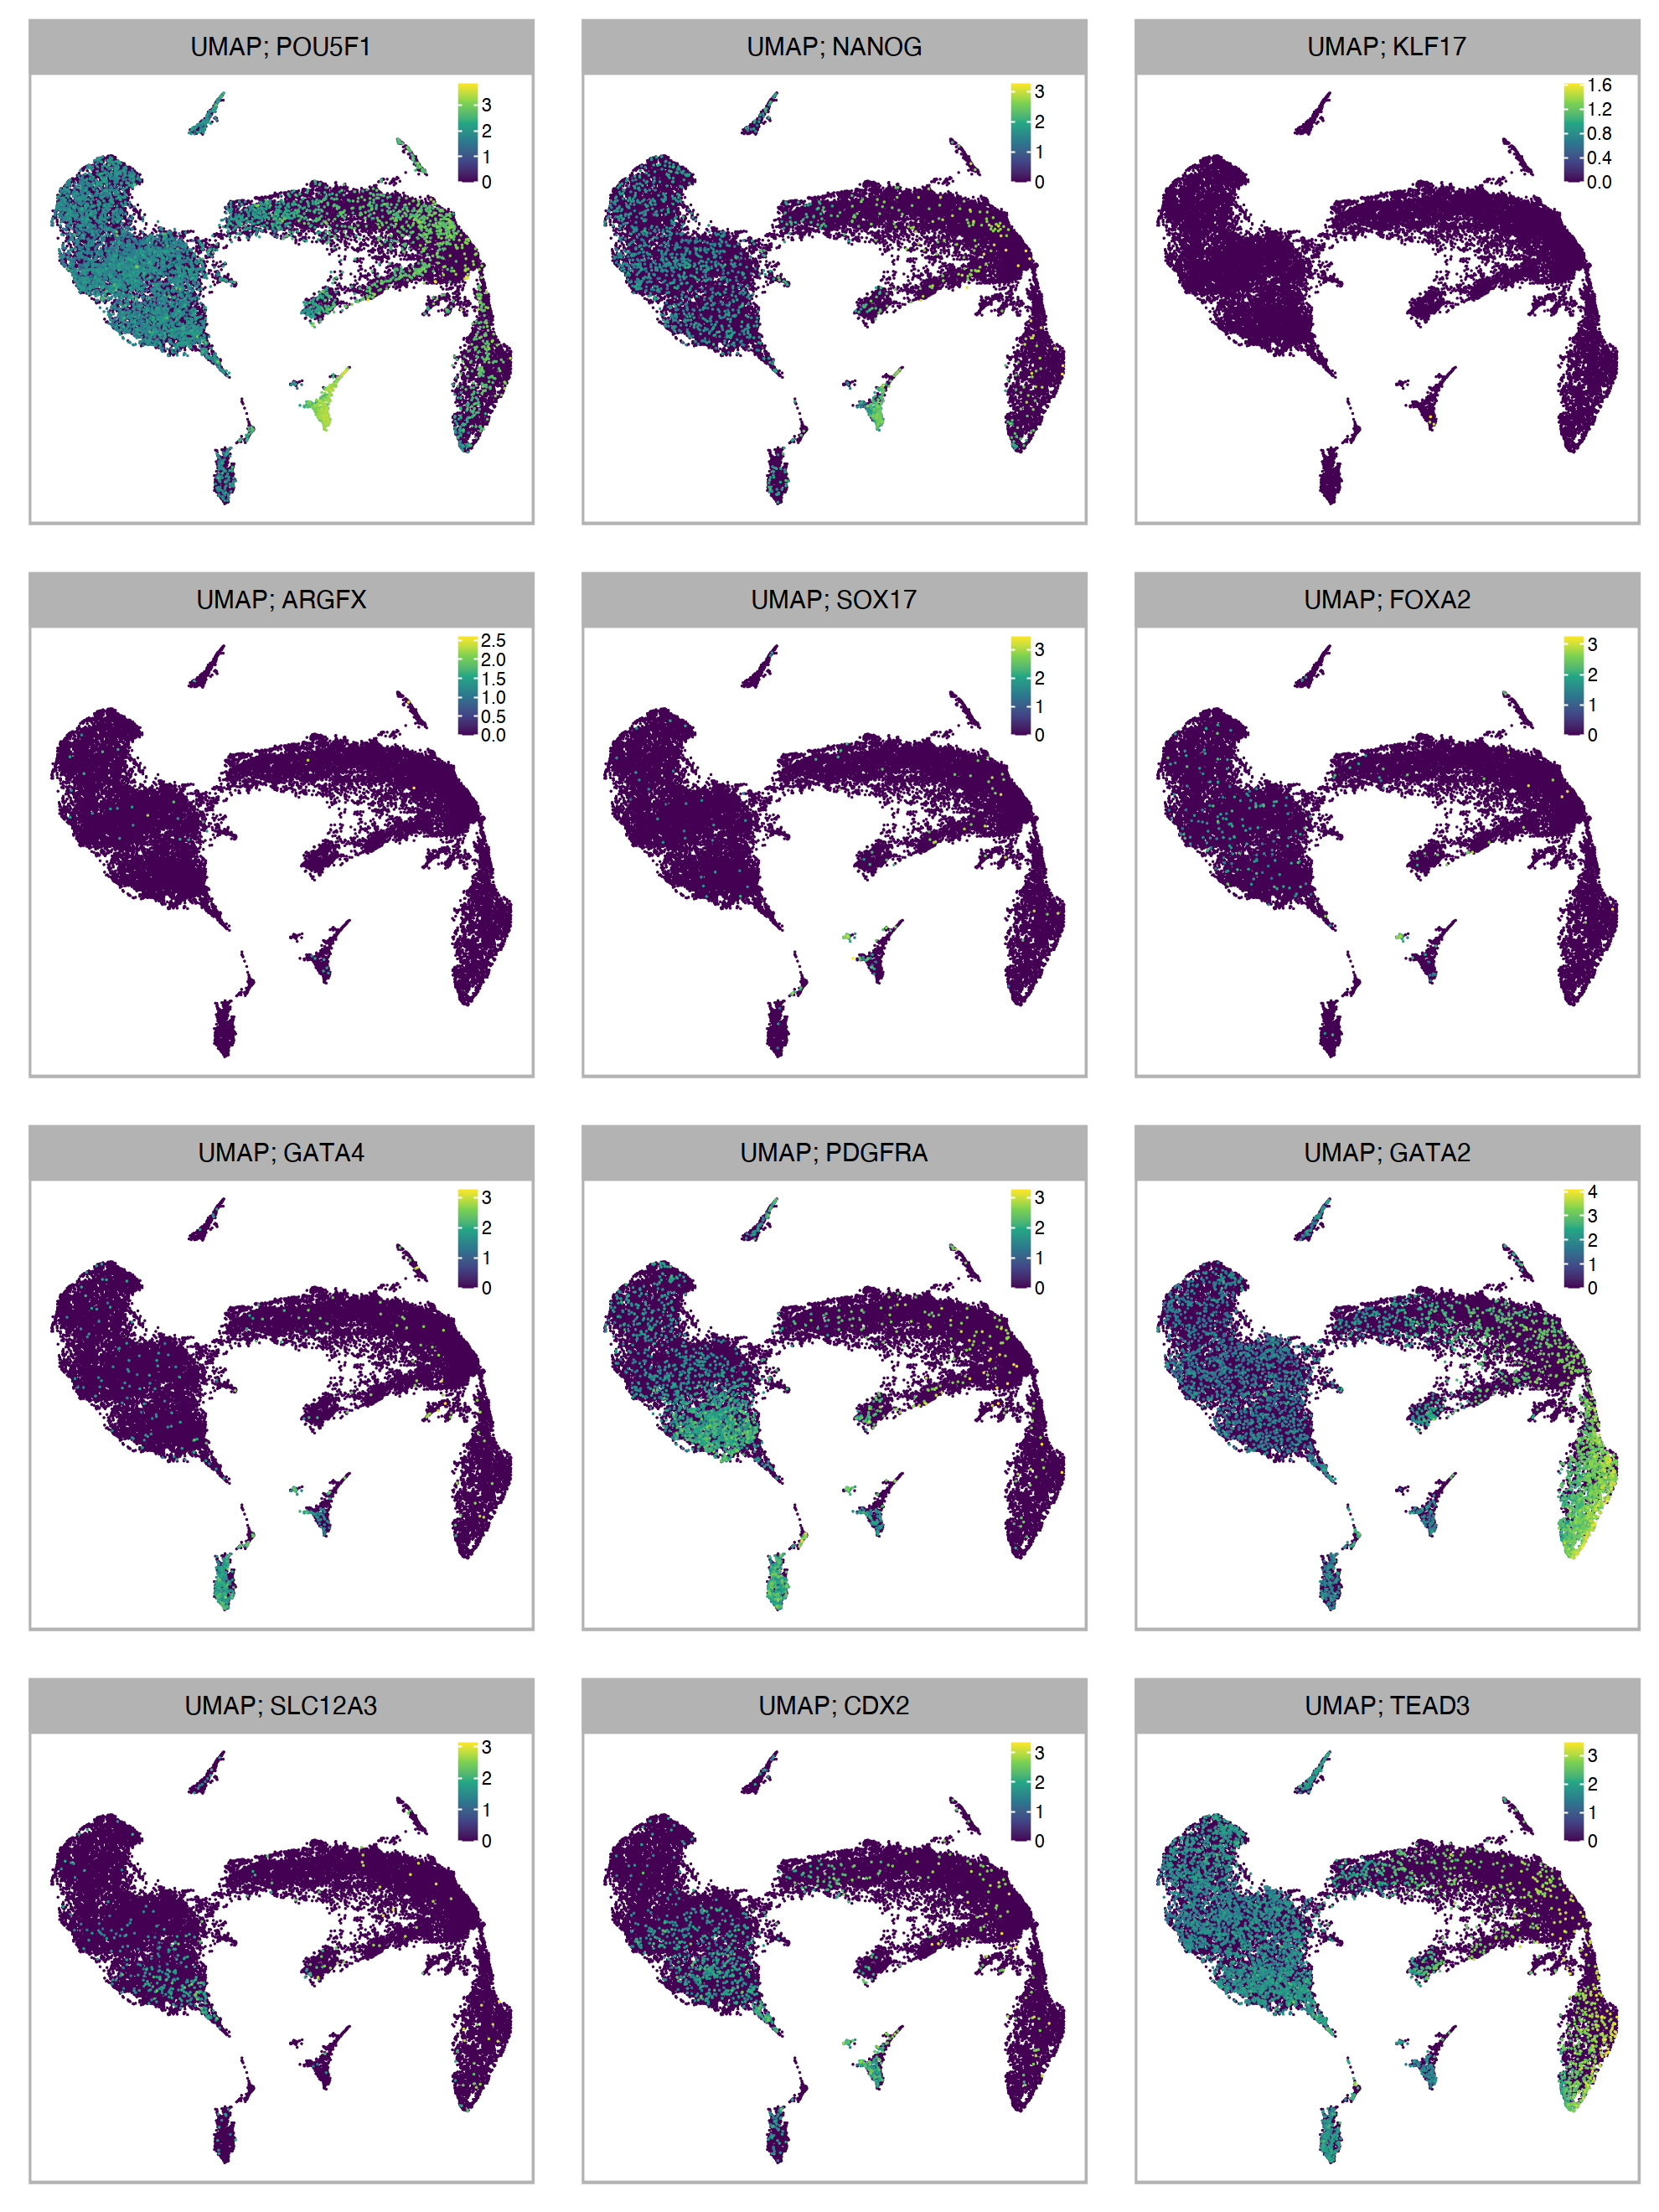

In [29]:
options(repr.plot.width = 6.6, repr.plot.height = 8.8, repr.plot.res = PPI)

purrr::map(FEATURES_SELECTED, function(x) {
    selected_feature <- x

    cat(selected_feature, "\n")
    values <- log10(calc_cpm(matrix_readcount_use[, embedding$cell])[selected_feature, ] + 1)

    p1 <- plot_embedding(
        embedding = embedding[, c(x_column, y_column)],
        color_values = values,
        label = paste(
            EMBEDDING_TITLE_PREFIX,
            selected_feature |> stringr::str_remove(pattern = "^E.+_"),
            sep = "; "
        ),
        label_position = NULL,
        show_color_value_labels = FALSE,
        show_color_legend = TRUE,
        geom_point_size = GEOM_POINT_SIZE * 2,
        sort_values = TRUE,
        shuffle_values = FALSE,
        rasterise = RASTERISED,
        legend_size = 2
    ) +
        scale_color_viridis_c(
            na.value = "grey80"
        ) +
        theme_customized(
            x = CB_POSITION[1] + 0.05,
            legend_key_size = 2,
            legend_text_size = 5
        )

    return(p1)
}) |>
    # unlist(recursive = FALSE) |>
    purrr::reduce(`+`) +
    patchwork::plot_layout(ncol = 3) +
    patchwork::plot_annotation(
        theme = theme(plot.margin = margin())
    )

# R session info

In [30]:
devtools::session_info()$platform

 setting  value                       
 version  R version 4.1.1 (2021-08-10)
 os       macOS Big Sur 11.5.2        
 system   x86_64, darwin20.4.0        
 ui       unknown                     
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/Chicago             
 date     2021-09-11                  

In [31]:
devtools::session_info()$pack |>
    as_tibble() |>
    dplyr::select(
        package,
        loadedversion,
        date,
        `source`
    )

package     loadedversion date       source                              
1  assertthat  0.2.1         2019-03-21 CRAN (R 4.1.1)                      
2  backports   1.2.1         2020-12-09 CRAN (R 4.1.1)                      
3  base64enc   0.1-3         2015-07-28 CRAN (R 4.1.1)                      
4  beeswarm    0.4.0         2021-06-01 CRAN (R 4.1.1)                      
5  bit         4.0.4         2020-08-04 CRAN (R 4.1.1)                      
6  bit64       4.0.5         2020-08-30 CRAN (R 4.1.1)                      
7  broom       0.7.9         2021-07-27 CRAN (R 4.1.1)                      
8  cachem      1.0.6         2021-08-19 CRAN (R 4.1.1)                      
9  Cairo       1.5-12.2      2020-07-07 CRAN (R 4.1.1)                      
10 callr       3.7.0         2021-04-20 CRAN (R 4.1.1)                      
11 cellranger  1.1.0         2016-07-27 CRAN (R 4.1.1)                      
12 cli         3.0.1         2021-07-17 CRAN (R 4.1.1)                      
13 colorspace  2.0-2         2021-06-24 CRAN (R 4.1.1)                      
14 crayon      1.4.1         2021-02-08 CRAN (R 4.1.1)                      
15 DBI         1.1.1         2021-01-15 CRAN (R 4.1.1)                      
16 dbplyr      2.1.1         2021-04-06 CRAN (R 4.1.1)                      
17 desc        1.3.0         2021-03-05 CRAN (R 4.1.1)                      
18 devtools    2.4.2         2021-08-19 Github (r-lib/devtools@e10658f)     
19 digest      0.6.27        2020-10-24 CRAN (R 4.1.1)                      
20 dplyr       1.0.7.9000    2021-09-08 Github (tidyverse/dplyr@47b3fdf)    
21 ellipsis    0.3.2         2021-04-29 CRAN (R 4.1.1)                      
22 evaluate    0.14          2019-05-28 CRAN (R 4.1.1)                      
23 extrafont   0.17          2014-12-08 CRAN (R 4.1.1)                      
24 extrafontdb 1.0           2012-06-11 CRAN (R 4.1.1)                      
25 fansi       0.5.0         2021-05-25 CRAN (R 4.1.1)                      
26 farver      2.1.0         2021-02-28 CRAN (R 4.1.1)                      
27 fastmap     1.1.0         2021-01-25 CRAN (R 4.1.1)                      
28 forcats     0.5.1.9000    2021-08-15 Github (tidyverse/forcats@b5fce89)  
29 fs          1.5.0.9000    2021-08-15 Github (r-lib/fs@10e38dd)           
30 generics    0.1.0         2020-10-31 CRAN (R 4.1.1)                      
⋮  ⋮           ⋮             ⋮          ⋮                                   
69 repr        1.1.3         2021-01-21 CRAN (R 4.1.1)                      
70 reprex      2.0.1         2021-08-05 CRAN (R 4.1.1)                      
71 reticulate  1.20          2021-05-03 CRAN (R 4.1.1)                      
72 rlang       0.4.11.9001   2021-09-08 Github (r-lib/rlang@9c6291f)        
73 rprojroot   2.0.2         2020-11-15 CRAN (R 4.1.1)                      
74 rstudioapi  0.13.0-9000   2021-08-15 Github (rstudio/rstudioapi@96fad1d) 
75 Rttf2pt1    1.3.9         2021-07-22 CRAN (R 4.1.1)                      
76 rvest       1.0.1         2021-07-26 CRAN (R 4.1.1)                      
77 scales      1.1.1         2020-05-11 CRAN (R 4.1.1)                      
78 sessioninfo 1.1.1         2018-11-05 CRAN (R 4.1.1)                      
79 stringi     1.7.4         2021-08-25 CRAN (R 4.1.1)                      
80 stringr     1.4.0         2019-02-10 CRAN (R 4.1.1)                      
81 styler      1.5.1.9001    2021-09-12 Github (r-lib/styler@6300c7c)       
82 systemfonts 1.0.2         2021-05-11 CRAN (R 4.1.1)                      
83 testthat    3.0.4.9000    2021-09-11 Github (r-lib/testthat@2dc496c)     
84 textshaping 0.3.5         2021-06-09 CRAN (R 4.1.1)                      
85 tibble      3.1.4.9000    2021-08-26 Github (tidyverse/tibble@e3e40af)   
86 tidyr       1.1.3.9000    2021-08-27 Github (tidyverse/tidyr@7947507)    
87 tidyselect  1.1.1         2021-04-30 CRAN (R 4.1.1)                      
88 tidyverse   1.3.1.9000    2021-08-16 Github (tidyverse/tidyverse@195d8a4)